In [1]:
import pandas as pd

In [24]:
# We load the file http://www.superdatascience.com/wp-content/uploads/2015/06/OfficeSupplies.csv
df = pd.read_csv('./data/OfficeSupplies.csv')

In [25]:
# get a sneak peak of the data
df.head()

,OrderDate,Region,Rep,Item,Units,Unit Price
0,4-Jul-2014,East,Richard,Pen Set,62,4.99
1,12-Jul-2014,East,Nick,Binder,29,1.99
2,21-Jul-2014,Central,Morgan,Pen Set,55,12.49
3,29-Jul-2014,East,Susan,Binder,81,19.99
4,7-Aug-2014,Central,Matthew,Pen Set,42,23.95


In [5]:
# Get information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 0 to 42
Data columns (total 6 columns):
OrderDate     43 non-null object
Region        43 non-null object
Rep           43 non-null object
Item          43 non-null object
Units         43 non-null int64
Unit Price    43 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 2.4+ KB


### Listing unique values

In [44]:
# We can filter this data to see the number of unique items in the data
df['Item'].unique()

array(['Pen Set', 'Binder', 'Pencil', 'Desk', 'Pen'], dtype=object)

### Slicing the dataframe

In [59]:
# We can create a subset of the dataframe to get OrderDate, Items and their unit price
df[['OrderDate','Item','Unit Price']].head()

,OrderDate,Item,Unit Price
0,4-Jul-2014,Pen Set,4.99
1,12-Jul-2014,Binder,1.99
2,21-Jul-2014,Pen Set,12.49
3,29-Jul-2014,Binder,19.99
4,7-Aug-2014,Pen Set,23.95


### Creating a dataframe for timeseries analysis

In [18]:
# Next we load the date field as dates and create an index on it 
df2 = pd.read_csv('./data/OfficeSupplies.csv', parse_dates=True, index_col='OrderDate')
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43 entries, 2014-07-04 to 2015-06-25
Data columns (total 5 columns):
Region        43 non-null object
Rep           43 non-null object
Item          43 non-null object
Units         43 non-null int64
Unit Price    43 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.0+ KB


In [19]:
# Lets check the data now. Notice the OrderDate column is now the index
df2.head()

,Region,Rep,Item,Units,Unit Price
OrderDate,,,,,
2014-07-04,East,Richard,Pen Set,62,4.99
2014-07-12,East,Nick,Binder,29,1.99
2014-07-21,Central,Morgan,Pen Set,55,12.49
2014-07-29,East,Susan,Binder,81,19.99
2014-08-07,Central,Matthew,Pen Set,42,23.95


In [20]:
# Lets calculate the total sales by multiplying Units and Unit Price
df2['TotalSales'] = df2['Units'] * df2 ['Unit Price']

In [21]:
df2.head()

,Region,Rep,Item,Units,Unit Price,TotalSales
OrderDate,,,,,,
2014-07-04,East,Richard,Pen Set,62,4.99,309.38
2014-07-12,East,Nick,Binder,29,1.99,57.71
2014-07-21,Central,Morgan,Pen Set,55,12.49,686.95
2014-07-29,East,Susan,Binder,81,19.99,1619.19
2014-08-07,Central,Matthew,Pen Set,42,23.95,1005.90


### Ploting timeseries data

In [65]:
import matplotlib.pyplot as plt

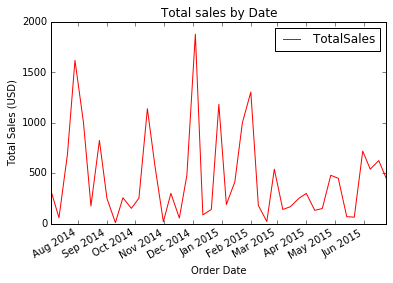

In [67]:
# Now let's plot this data

# Allow notebook to put an inline plot
%matplotlib inline

# Now let's use pandas plot to plot the timeseries data 
df2[[ 'TotalSales']].plot(color='red')
plt.title('Total sales by Date')
plt.xlabel('Order Date')
plt.ylabel('Total Sales (USD)')
plt.show()

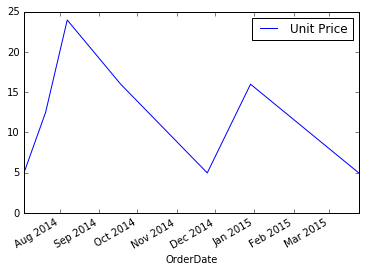

In [68]:
# We can see how the price of an item changed by date
df3 = df2[['Item','Unit Price']]

# Let's see how the price of Pen Set changed over time
pen_df = df3[df3['Item']=='Pen Set']
pen_df.plot()

#### Multi-plot

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f916fa1e160>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f916f884ef0>], dtype=object)

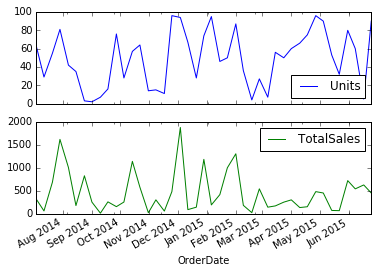

In [70]:
# We can plot two columns as subplots to see any co-relation between the data
df2[['Units', 'TotalSales']].plot(subplots=True)

### Writing this data

In [61]:
# We can write the data from dataframe to various formats

df2.to_csv('OfficeSupplies_WithSales.csv')